
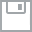
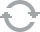
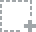
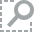
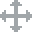
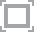
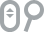
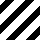
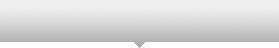
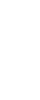
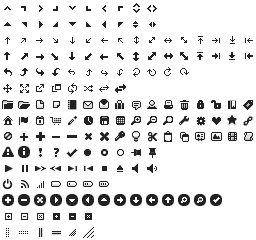
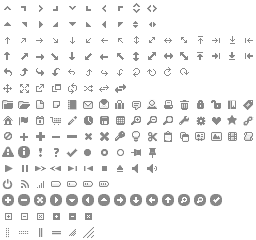
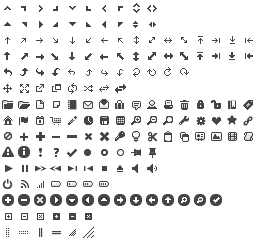
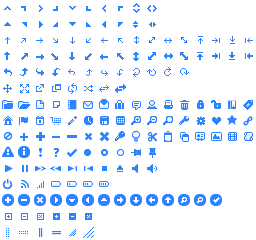
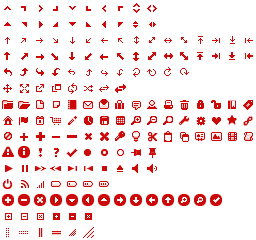
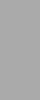
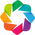
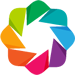

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from bokeh.io import output_notebook, show
output_notebook()
%matplotlib inline

In [3]:
twitter = pd.read_csv('livesmatter_vpsingh.csv')
twitter.head(1)

,source_id,date_time,username,post,latitude,longitude,Unnamed: 6,Unnamed: 7
0,6.847964e+17,2016-01-06T17:59:24Z,fundraisinisfun,A few days ago I posted a comment with the has...,NaN,NaN,NaN,NaN


In [4]:
twitter.describe

<bound method DataFrame.describe of          source_id             date_time         username  \
0     6.847964e+17  2016-01-06T17:59:24Z  fundraisinisfun   
1     6.847958e+17  2016-01-06T17:56:46Z  Evilution_6_6_6   
2     6.847950e+17  2016-01-06T17:53:49Z     FakeAvatar67   
3     6.847948e+17  2016-01-06T17:53:06Z           Nexahs   
4     6.847946e+17  2016-01-06T17:52:17Z        ascribeIO   
5     6.847946e+17  2016-01-06T17:52:00Z           Nexahs   
6     6.847944e+17  2016-01-06T17:51:21Z      NorronaNatt   
7     6.847930e+17  2016-01-06T17:45:53Z        Jani_Lixx   
8     6.847926e+17  2016-01-06T17:44:21Z  fuckoffcoldplay   
9     6.847924e+17  2016-01-06T17:43:35Z   MCEngineer1349   
10    6.847924e+17  2016-01-06T17:43:28Z    salmanchelsea   
11    6.847919e+17  2016-01-06T17:41:16Z     neonwhite900   
12    6.847917e+17  2016-01-06T17:40:42Z          BGarg27   
13    6.847917e+17  2016-01-06T17:40:39Z      onetireddad   
14    6.847916e+17  2016-01-06T17:40:19Z      Kaz

In [8]:
twitter.columns

Index([u'source_id', u'date_time', u'username', u'post', u'latitude',
       u'longitude', u'Unnamed: 6', u'Unnamed: 7'],
      dtype='object')

In [9]:
twitter.shape

(5253, 8)

In [10]:
twitter.values

array([[6.84796420021481e+17, '2016-01-06T17:59:24Z', 'fundraisinisfun',
        ..., nan, nan, nan],
       [6.84795757690503e+17, '2016-01-06T17:56:46Z', 'Evilution_6_6_6',
        ..., '-1', nan, nan],
       [6.84795015885803e+17, '2016-01-06T17:53:49Z', 'FakeAvatar67', ...,
        nan, nan, nan],
       ..., 
       [6.82292434697601e+17, '2015-12-30T20:09:27Z', 'El_OptiMist', ...,
        '-3', nan, nan],
       [6.83314263772e+17, '2016-01-02T15:49:50Z', 'deviki_p', ..., nan,
        'https://twitter.com/deviki_p/status/683314263772000257', nan],
       [6.83313605371113e+17, '2016-01-02T15:47:13Z', 'deviki_p', ..., nan,
        'https://twitter.com/deviki_p/status/683313605371113472', nan]], dtype=object)

In [11]:
twitter.post

0       A few days ago I posted a comment with the has...
1                            @SkyNews #WhiteLivesMatter !
2       RT @UtsavBabel: Tell everyone you know - onlin...
3       RT @DJ_DTM: Men with guns stealing land? Never...
4       Came across @antigravity in my recent trip to ...
5       #BlackLivesMatter completely ignore native liv...
6       RT @StopHateCrimez: #whitelivesmatter\nBlack m...
7       and when they turn Rosa Parks message, and twi...
8       @FemLivesMatter I'd consider myself active in ...
9       RT @AZPatriot01: RT! RT! RT!\n\nSee the kind o...
10      RT @FemLivesMatter: @KazAslam786 Australian me...
11                                      #gnomelivesmatter
12      RT @UtsavBabel: Of course they don't care. #Hi...
13      RT @ericbolling: Did you suggest "shoot to kil...
14      RT @FemLivesMatter: @KazAslam786 Australian me...
15      The tree of life_ mystical symbols... #AllLive...
16      RT @FemLivesMatter: @simone_ayeshia Racist whi...
17      Someth

In [12]:
twitter.describe()

,source_id
count,5.252000e+03
mean,6.776851e+17
std,5.568372e+15
min,6.718767e+17
25%,6.725170e+17
50%,6.730000e+17
75%,6.832513e+17
max,6.847964e+17


In [13]:
twitter.describe(include='all')

,source_id,date_time,username,post,latitude,longitude,Unnamed: 6,Unnamed: 7
count,5.252000e+03,5253,5253,5253,1677,1675,3,14
unique,NaN,4101,2989,2911,70,92,3,14
top,NaN,2015-12-31T17:26:50Z,mikelbtko,RT @BerenabasG: Make This Viral!! \nWe Need An...,52,0,https://twitter.com/deviki_p/status/6833142637...,https://twitter.com/FulcrumAmber/status/671873...
freq,NaN,7,96,189,289,225,1,1
mean,6.776851e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.568372e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.718767e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.725170e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.730000e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.832513e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
twitter.drop(['source_id', 'Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)  

In [15]:
twitter.columns

Index([u'date_time', u'username', u'post', u'latitude', u'longitude'], dtype='object')

In [16]:
vect = CountVectorizer()

In [17]:
X = vect.fit_transform(twitter.post)

In [18]:
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [19]:
X

<5253x9421 sparse matrix of type '<type 'numpy.int64'>'
	with 74216 stored elements in Compressed Sparse Row format>

In [25]:
analyze = vect.build_analyzer()


In [28]:
analyze("This is a test to for text analysis")

[u'this', u'is', u'test', u'to', u'for', u'text', u'analysis']

In [29]:
X.shape

(5253, 9421)

In [30]:
# last 100 features
print vect.get_feature_names()[-100:]

[u'zero', u'zf5fge3hon', u'zftnlfmnhl', u'zi5hggwrzz', u'ziehen', u'ziemlich', u'zimbabwe', u'zimbabwelivesmatter', u'zionism', u'zionist', u'zip', u'zippednews', u'zkbs0ei8fw', u'zl78qzqfie', u'zld4zzouw5', u'zm6e4zagd8', u'zmjr_', u'znaukyr7sk', u'znlagyo4mw', u'znovkeelz4', u'zoe', u'zoo', u'zoombiniz', u'zoqcjzfcwe', u'zou', u'zpdgsu3dqm', u'zpf1fsaofz', u'zpi', u'zpzfl9gbza', u'zq0doxw4vu', u'zq3ikjgvrr', u'zqb8tspvey', u'zrgfzc7lj7', u'zsuh2vtmfn', u'ztotnhzdn8', u'zulmaferme', u'zuretqdj53', u'zusq9sfmvw', u'zvbqenxvdr', u'zvrlg5l0d3', u'zvtad0hgoz', u'zvyfwmfezg', u'zw', u'zwartepiet', u'zxdhi0dqwf', u'zxg0kocebu', u'zykdnkuoxz', u'zypef0zgdd', u'zzi5vy7ws9', u'\xe4r', u'\xe5terigen', u'\xfanico', u'\xfeennan', u'\xfeurfti', u'\u03b3\u03b9\u03b1', u'\u03b4\u03b5\u03bd', u'\u03b8\u03b5\u03c1\u03b1\u03c0\u03b5\u03af\u03b1', u'\u03bb\u03bf\u03b1\u03c4', u'\u03c3\u03b5\u03be\u03bf\u03c5\u03b1\u03bb\u03b9\u03ba\u03ae', u'\u03c4\u03b1\u03c5\u03c4\u03cc\u03c4\u03b7\u03c4\u03b1', u'\u0

In [31]:
# include 1-grams and 2-grams, we end up with many features
vect = CountVectorizer(ngram_range=(1, 2))
X = vect.fit_transform(twitter.post)
X.shape

(5253, 33852)

In [32]:
# First 1000 features
print vect.get_feature_names()[1000:]

[u'across antigravity', u'across the', u'across this', u'acspollen', u'acspollen cop', u'act', u'act https', u'act like', u'act now', u'act of', u'act that', u'acting', u'acting in', u'acting the', u'action', u'action alert', u'action and', u'action blocklivesmatter', u'action mmiw', u'action on', u'action packed', u'action to', u'actionnowchi', u'actionnowchi people', u'actions', u'actions act', u'actions of', u'activated', u'activated safety', u'active', u'active in', u'actively', u'actively demonizing', u'activism', u'activism aims', u'activism campaigns', u'activism going', u'activism https', u'activist', u'activist are', u'activist working', u'activists', u'activists are', u'activists blocked', u'activists can', u'activists https', u'activists in', u'actonclimate', u'actonclimate obama', u'actor', u'actor realjameswoods', u'acts', u'acts like', u'acts of', u'actu', u'actu https', u'actual', u'actual evidence', u'actual problems', u'actually', u'actually alllivesmatter', u'actually

In [33]:
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [34]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

In [35]:
# set of stop words
print vect.get_stop_words()

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'four', 'not', 'own', 'through', 'yourselves', 'fify', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'go', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'neit

In [36]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)

In [37]:
print twitter.post[0:-100]

0       A few days ago I posted a comment with the has...
1                            @SkyNews #WhiteLivesMatter !
2       RT @UtsavBabel: Tell everyone you know - onlin...
3       RT @DJ_DTM: Men with guns stealing land? Never...
4       Came across @antigravity in my recent trip to ...
5       #BlackLivesMatter completely ignore native liv...
6       RT @StopHateCrimez: #whitelivesmatter\nBlack m...
7       and when they turn Rosa Parks message, and twi...
8       @FemLivesMatter I'd consider myself active in ...
9       RT @AZPatriot01: RT! RT! RT!\n\nSee the kind o...
10      RT @FemLivesMatter: @KazAslam786 Australian me...
11                                      #gnomelivesmatter
12      RT @UtsavBabel: Of course they don't care. #Hi...
13      RT @ericbolling: Did you suggest "shoot to kil...
14      RT @FemLivesMatter: @KazAslam786 Australian me...
15      The tree of life_ mystical symbols... #AllLive...
16      RT @FemLivesMatter: @simone_ayeshia Racist whi...
17      Someth

In [38]:
tweet = TextBlob(twitter.post[0])

In [44]:
tweet

TextBlob("@SteeScribbles @BroTeamPill #HorseLivesMatter
end Brote Ampill's endless tuxedoing of equines")

In [45]:
tweet.words

WordList(['SteeScribbles', 'BroTeamPill', 'HorseLivesMatter', 'end', 'Brote', 'Ampill', "'s", 'endless', 'tuxedoing', 'of', 'equines'])

In [46]:
tweet.sentences

[Sentence("@SteeScribbles @BroTeamPill #HorseLivesMatter
 end Brote Ampill's endless tuxedoing of equines")]

In [47]:
tweet = TextBlob(twitter.post[100])

In [48]:
tweet

TextBlob("@SteeScribbles @BroTeamPill #HorseLivesMatter
end Brote Ampill's endless tuxedoing of equines")

In [49]:
tweet = TextBlob(twitter.post[277])

In [50]:
tweet

TextBlob("Marine arrested in fatal shooting of college student https://t.co/EsW8o0YHYT via @nypost #BlackLivesMatter #AllLIVESMATTER #WhiteLivesMatter")

In [51]:
stemmer = SnowballStemmer('english')

# stem each word
print [stemmer.stem(word) for word in tweet.words]

[u'marin', u'arrest', u'in', u'fatal', u'shoot', u'of', u'colleg', u'student', u'https', u't.co/esw8o0yhyt', u'via', u'nypost', u'blacklivesmatt', u'alllivesmatt', u'whitelivesmatt']


In [52]:
# assume every word is a noun
print [word.lemmatize() for word in tweet.words]

['Marine', 'arrested', 'in', 'fatal', 'shooting', 'of', 'college', 'student', u'http', 't.co/EsW8o0YHYT', 'via', 'nypost', 'BlackLivesMatter', 'AllLIVESMATTER', 'WhiteLivesMatter']


In [53]:
# assume every word is a verb
print [word.lemmatize(pos='v') for word in tweet.words]

['Marine', u'arrest', 'in', 'fatal', u'shoot', 'of', 'college', 'student', 'https', 't.co/EsW8o0YHYT', 'via', 'nypost', 'BlackLivesMatter', 'AllLIVESMATTER', 'WhiteLivesMatter']


In [54]:
# TDF-IF
transformer = TfidfTransformer()
transformer

TfidfTransformer(norm=u'l2', smooth_idf=True, sublinear_tf=False,
         use_idf=True)

In [55]:
simple_train = ['happy', 'sad', 'distraught', 'saddened', 'estatic', 'sickened', 'hopeful', 'peace', 'death', 'died', 'killed', 'attack', 'history', 'this day', 'stop the', 'hope', 'america', 'human', 'transgender', 'race', 'gender', 'black', 'white', 'refugee', 'animal', 'blue', 'terror', 'terrorist']

In [56]:
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,america,animal,attack,black,blue,day,death,died,distraught,estatic,...,sad,saddened,sickened,stop,terror,terrorist,the,this,transgender,white
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Document Frequency - in how many documents does each word appear
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 30), columns=vect.get_feature_names())

,america,animal,attack,black,blue,day,death,died,distraught,estatic,...,sad,saddened,sickened,stop,terror,terrorist,the,this,transgender,white
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [58]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,america,animal,attack,black,blue,day,death,died,distraught,estatic,...,sad,saddened,sickened,stop,terror,terrorist,the,this,transgender,white
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,america,animal,attack,black,blue,day,death,died,distraught,estatic,...,sad,saddened,sickened,stop,terror,terrorist,the,this,transgender,white
0,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0,0
1,0,0,0,0,0,0.000000,0,0,0,0,...,1,0,0,0.000000,0,0,0.000000,0.000000,0,0
2,0,0,0,0,0,0.000000,0,0,1,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0,0
3,0,0,0,0,0,0.000000,0,0,0,0,...,0,1,0,0.000000,0,0,0.000000,0.000000,0,0
4,0,0,0,0,0,0.000000,0,0,0,1,...,0,0,0,0.000000,0,0,0.000000,0.000000,0,0
5,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,1,0.000000,0,0,0.000000,0.000000,0,0
6,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0,0
7,0,0,0,0,0,0.000000,0,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0,0
8,0,0,0,0,0,0.000000,1,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0,0
9,0,0,0,0,0,0.000000,0,1,0,0,...,0,0,0,0.000000,0,0,0.000000,0.000000,0,0


In [169]:
print tweet

Marine arrested in fatal shooting of college student https://t.co/EsW8o0YHYT via @nypost #BlackLivesMatter #AllLIVESMATTER #WhiteLivesMatter


In [170]:
# polarity ranges from -1 (most negative) to 1 (most positive)
tweet.sentiment.polarity

0.0

In [174]:
tweet = TextBlob(twitter.post[5])

In [175]:
print tweet

#BlackLivesMatter completely ignore native lives and Hispanic/Latin lives but complain about #AllLivesMatter


In [176]:
# polarity ranges from -1 (most negative) to 1 (most positive)
tweet.sentiment.polarity

0.1

In [177]:
tweet = TextBlob(twitter.post[20])

In [178]:
print tweet

Moussa french humanitarian in #CoxBazar jail. #FreeMoussa #MuslimLivesMatter #Rohingyas https://t.co/xWISGOxLQI


In [179]:
# polarity ranges from -1 (most negative) to 1 (most positive)
tweet.sentiment.polarity

-0.05